In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import scipy.stats as st
from sklearn import metrics
import mpl_toolkits
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
# Loading the data, minding null values
data = pd.read_csv("Class.csv", na_values = [0, ""], keep_default_na = False)

In [3]:
# Data Exploration
data.head()

,ID#,Set,SMILES,Fub,Name,CAS,a_base,a_nN,a_nS,BCUT_SLOGP_0,...,PEOE_VSA_PPOS,SlogP,SlogP_VSA6,SMR_VSA6,VAdjEq,ABNW,kNN_Pred,SVM_Pred,RF_Pred,Con_Pred
0,1.0004,Dte,OC1(CCC2C3C(CCC12C)C1(C(=CC(=O)CC1)CC3)C)C(=O)C,0.15,17-hydroxyprogesterone,NaN,NaN,NaN,NaN,-2.870618,...,NaN,3.83840,NaN,11.375222,0.448864,Ni,0.065,0.066,0.137,0.089333
1,1.0005,Dte,OC1CCC2C3C(CCC12C)c1c(cc(O)cc1)CC3,0.02,17-a-estradiol,NaN,NaN,NaN,NaN,-2.803789,...,NaN,3.60917,4.410796,NaN,0.514816,Ni,0.049,0.049,0.036,0.044667
2,1.0012,Dte,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2cc(ccc2)C(F)(F)F)c...,0.38,3b(m-CF3),NaN,NaN,3.0,NaN,-2.888218,...,32.212521,3.86850,7.759516,87.191391,0.368752,Zi,0.605,0.053,0.331,0.329667
3,1.0019,Dte,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2cc(OC)ccc2)cc1N1CC...,0.65,5b(m-OCH3),NaN,NaN,3.0,NaN,-2.888218,...,23.167019,2.54680,NaN,87.191391,0.388286,Zi,0.615,0.234,0.662,0.503667
4,1.0026,Dte,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccc([N+](=O)[O-])c...,0.70,7c(p-NO2),NaN,NaN,4.0,NaN,-2.888218,...,29.866570,2.44640,NaN,87.191391,0.378242,Zi,0.615,0.214,0.404,0.411000


In [4]:
# Checking the shape of the data
data.shape

(1651, 32)

In [5]:
# Checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 32 columns):
ID#               1651 non-null float64
Set               1651 non-null object
SMILES            1651 non-null object
Fub               1602 non-null float64
Name              1651 non-null object
CAS               941 non-null object
a_base            32 non-null float64
a_nN              1349 non-null float64
a_nS              450 non-null float64
BCUT_SLOGP_0      1651 non-null float64
BCUT_SLOGP_2      1651 non-null float64
GCUT_PEOE_0       1651 non-null float64
GCUT_PEOE_1       1651 non-null float64
GCUT_SLOGP_0      1651 non-null float64
GCUT_SMR_0        1651 non-null float64
logP(o/w)         1651 non-null float64
logS              1651 non-null float64
PEOE_VSA+1        1394 non-null float64
PEOE_VSA+4        675 non-null float64
PEOE_VSA_FPOL     1537 non-null float64
PEOE_VSA_FPPOS    1315 non-null float64
PEOE_VSA_POL      1537 non-null float64
PEOE_VSA_PPOS     1315

There are 4 character type data while rest are float.

In [6]:
# Checking the % of missing data upto 2 decimal points
percent_missing = data.isnull().sum() * 100 / len(data)
print(round(percent_missing,2))

ID#                0.00
Set                0.00
SMILES             0.00
Fub                2.97
Name               0.00
CAS               43.00
a_base            98.06
a_nN              18.29
a_nS              72.74
BCUT_SLOGP_0       0.00
BCUT_SLOGP_2       0.00
GCUT_PEOE_0        0.00
GCUT_PEOE_1        0.00
GCUT_SLOGP_0       0.00
GCUT_SMR_0         0.00
logP(o/w)          0.00
logS               0.00
PEOE_VSA+1        15.57
PEOE_VSA+4        59.12
PEOE_VSA_FPOL      6.90
PEOE_VSA_FPPOS    20.35
PEOE_VSA_POL       6.90
PEOE_VSA_PPOS     20.35
SlogP              0.00
SlogP_VSA6        75.23
SMR_VSA6          13.93
VAdjEq             0.00
ABNW               0.00
kNN_Pred           0.00
SVM_Pred           0.00
RF_Pred            0.00
Con_Pred           0.00
dtype: float64


a_base, a_nS, PEOE VSA+4, SlogP_VSA6 have more than 50% missing data and hence can be dropped before training the model

In [7]:
# Checking the column's header for splitting the data frames and dropping the columns as required
data.columns

Index(['ID#', 'Set', 'SMILES', 'Fub', 'Name', 'CAS', 'a_base', 'a_nN', 'a_nS',
       'BCUT_SLOGP_0', 'BCUT_SLOGP_2', 'GCUT_PEOE_0', 'GCUT_PEOE_1',
       'GCUT_SLOGP_0', 'GCUT_SMR_0', 'logP(o/w)', 'logS', 'PEOE_VSA+1',
       'PEOE_VSA+4', 'PEOE_VSA_FPOL', 'PEOE_VSA_FPPOS', 'PEOE_VSA_POL',
       'PEOE_VSA_PPOS', 'SlogP', 'SlogP_VSA6', 'SMR_VSA6', 'VAdjEq', 'ABNW',
       'kNN_Pred', 'SVM_Pred', 'RF_Pred', 'Con_Pred'],
      dtype='object')

In [8]:
# Creating separate dataframe for int and character datatypes columns for missing value treatment separately
data1 = pd.DataFrame(data, columns = ['Fub','a_base', 'a_nN', 'a_nS',
       'BCUT_SLOGP_0', 'BCUT_SLOGP_2', 'GCUT_PEOE_0', 'GCUT_PEOE_1',
       'GCUT_SLOGP_0', 'GCUT_SMR_0', 'logP(o/w)', 'logS', 'PEOE_VSA+1',
       'PEOE_VSA+4', 'PEOE_VSA_FPOL', 'PEOE_VSA_FPPOS', 'PEOE_VSA_POL',
       'PEOE_VSA_PPOS', 'SlogP', 'SlogP_VSA6', 'SMR_VSA6', 'VAdjEq' ])
data2 = pd.DataFrame(data, columns = ['ABNW','SMILES', 'Name'])

In [9]:
# Checking the continuous dataframe
data1

,Fub,a_base,a_nN,a_nS,BCUT_SLOGP_0,BCUT_SLOGP_2,GCUT_PEOE_0,GCUT_PEOE_1,GCUT_SLOGP_0,GCUT_SMR_0,...,PEOE_VSA+1,PEOE_VSA+4,PEOE_VSA_FPOL,PEOE_VSA_FPPOS,PEOE_VSA_POL,PEOE_VSA_PPOS,SlogP,SlogP_VSA6,SMR_VSA6,VAdjEq
0,0.150000,NaN,NaN,NaN,-2.870618,0.397666,-0.794701,-0.367739,-0.923300,-0.539023,...,45.216946,NaN,0.137061,NaN,40.700764,NaN,3.83840,NaN,11.375222,0.448864
1,0.020000,NaN,NaN,NaN,-2.803789,0.603392,-0.803359,-0.397914,-0.883601,-0.535662,...,NaN,NaN,0.059825,NaN,13.566921,NaN,3.60917,4.410796,NaN,0.514816
2,0.380000,NaN,3.0,NaN,-2.888218,0.704054,-0.843703,-0.457774,-1.154434,-0.503589,...,72.015152,8.458519,0.214715,0.089898,76.937576,32.212521,3.86850,7.759516,87.191391,0.368752
3,0.650000,NaN,3.0,NaN,-2.888218,0.681423,-0.843702,-0.465880,-1.154434,-0.503591,...,78.265129,8.458519,0.196656,0.064719,70.395828,23.167019,2.54680,NaN,87.191391,0.388286
4,0.700000,NaN,4.0,NaN,-2.888218,0.764078,-0.843702,-0.458581,-1.154434,-0.503591,...,105.451630,8.458519,0.304837,0.083894,108.522670,29.866570,2.44640,NaN,87.191391,0.378242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,0.066004,NaN,3.0,NaN,-2.761319,0.358970,-0.823177,-0.366836,-0.896386,-0.532744,...,4.519746,24.790518,0.138518,0.077973,44.040016,24.790518,3.60787,3.500607,NaN,0.468276
1647,NaN,NaN,NaN,NaN,-2.651465,0.123000,-0.807429,-0.373731,-0.888345,-0.531480,...,4.417079,NaN,0.148772,0.065746,66.565865,29.416998,4.53880,NaN,141.048480,0.361721
1648,0.734755,NaN,NaN,NaN,-2.923797,0.520303,-0.790096,-0.435447,-0.960555,-0.536861,...,NaN,30.516994,0.380650,0.093810,123.827160,30.516994,0.62050,NaN,32.301479,0.398935
1649,0.034805,NaN,NaN,NaN,-2.545479,0.123000,-0.788465,-0.336113,-1.293535,-0.530815,...,NaN,NaN,0.109882,0.062861,32.710983,18.713068,3.47440,NaN,62.778774,0.502104


In [10]:
# Missing value count
data1.isnull().sum()

Fub                 49
a_base            1619
a_nN               302
a_nS              1201
BCUT_SLOGP_0         0
BCUT_SLOGP_2         0
GCUT_PEOE_0          0
GCUT_PEOE_1          0
GCUT_SLOGP_0         0
GCUT_SMR_0           0
logP(o/w)            0
logS                 0
PEOE_VSA+1         257
PEOE_VSA+4         976
PEOE_VSA_FPOL      114
PEOE_VSA_FPPOS     336
PEOE_VSA_POL       114
PEOE_VSA_PPOS      336
SlogP                0
SlogP_VSA6        1242
SMR_VSA6           230
VAdjEq               0
dtype: int64

In [11]:
# Missing value percentage
percent_missing = data1.isnull().sum() * 100 / len(data1)
print(round(percent_missing,2))

Fub                2.97
a_base            98.06
a_nN              18.29
a_nS              72.74
BCUT_SLOGP_0       0.00
BCUT_SLOGP_2       0.00
GCUT_PEOE_0        0.00
GCUT_PEOE_1        0.00
GCUT_SLOGP_0       0.00
GCUT_SMR_0         0.00
logP(o/w)          0.00
logS               0.00
PEOE_VSA+1        15.57
PEOE_VSA+4        59.12
PEOE_VSA_FPOL      6.90
PEOE_VSA_FPPOS    20.35
PEOE_VSA_POL       6.90
PEOE_VSA_PPOS     20.35
SlogP              0.00
SlogP_VSA6        75.23
SMR_VSA6          13.93
VAdjEq             0.00
dtype: float64


In [12]:
# Imputing null values with mean for numerical missing values
data1.fillna(data.mean(), inplace=True)

In [13]:
data1.isnull().sum()

Fub               0
a_base            0
a_nN              0
a_nS              0
BCUT_SLOGP_0      0
BCUT_SLOGP_2      0
GCUT_PEOE_0       0
GCUT_PEOE_1       0
GCUT_SLOGP_0      0
GCUT_SMR_0        0
logP(o/w)         0
logS              0
PEOE_VSA+1        0
PEOE_VSA+4        0
PEOE_VSA_FPOL     0
PEOE_VSA_FPPOS    0
PEOE_VSA_POL      0
PEOE_VSA_PPOS     0
SlogP             0
SlogP_VSA6        0
SMR_VSA6          0
VAdjEq            0
dtype: int64

In [14]:
# Checking 2nd dataframe containing strings
data2

,ABNW,SMILES,Name
0,Ni,OC1(CCC2C3C(CCC12C)C1(C(=CC(=O)CC1)CC3)C)C(=O)C,17-hydroxyprogesterone
1,Ni,OC1CCC2C3C(CCC12C)c1c(cc(O)cc1)CC3,17-a-estradiol
2,Zi,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2cc(ccc2)C(F)(F)F)c...,3b(m-CF3)
3,Zi,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2cc(OC)ccc2)cc1N1CC...,5b(m-OCH3)
4,Zi,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccc([N+](=O)[O-])c...,7c(p-NO2)
...,...,...,...
1646,Ni,Clc1ccc(cc1)CCC(O)(C(C)(C)C)Cn1ncnc1,Tebuconazole
1647,Ni,O(C(=O)C(CCCC)CC)CCOCCOCCOC(=O)C(CCCC)CC,Tri(ethylene glycol) bis(2-ethylhexanoate)
1648,Ni,F[C@@]12[C@H]([C@@H]3C[C@@H](O)[C@](O)(C(=O)CO...,Triamcinolone
1649,Ni,P(OCCCC)(OCCCC)(OCCCC)=O,Tributyl phosphate


In [15]:
# Missing value count
data2.isnull().sum()

ABNW      0
SMILES    0
Name      0
dtype: int64

No missing values.

In [16]:
# Merging both dataframe after treatment of missing values and storing in object
Clean_data = pd.concat([data1, data2], axis=1, sort=False)

In [17]:
# Checking the cleaned data
Clean_data

,Fub,a_base,a_nN,a_nS,BCUT_SLOGP_0,BCUT_SLOGP_2,GCUT_PEOE_0,GCUT_PEOE_1,GCUT_SLOGP_0,GCUT_SMR_0,...,PEOE_VSA_FPPOS,PEOE_VSA_POL,PEOE_VSA_PPOS,SlogP,SlogP_VSA6,SMR_VSA6,VAdjEq,ABNW,SMILES,Name
0,0.150000,1.25,2.740549,1.271111,-2.870618,0.397666,-0.794701,-0.367739,-0.923300,-0.539023,...,0.123752,40.700764,40.892817,3.83840,5.587049,11.375222,0.448864,Ni,OC1(CCC2C3C(CCC12C)C1(C(=CC(=O)CC1)CC3)C)C(=O)C,17-hydroxyprogesterone
1,0.020000,1.25,2.740549,1.271111,-2.803789,0.603392,-0.803359,-0.397914,-0.883601,-0.535662,...,0.123752,13.566921,40.892817,3.60917,4.410796,39.648098,0.514816,Ni,OC1CCC2C3C(CCC12C)c1c(cc(O)cc1)CC3,17-a-estradiol
2,0.380000,1.25,3.000000,1.271111,-2.888218,0.704054,-0.843703,-0.457774,-1.154434,-0.503589,...,0.089898,76.937576,32.212521,3.86850,7.759516,87.191391,0.368752,Zi,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2cc(ccc2)C(F)(F)F)c...,3b(m-CF3)
3,0.650000,1.25,3.000000,1.271111,-2.888218,0.681423,-0.843702,-0.465880,-1.154434,-0.503591,...,0.064719,70.395828,23.167019,2.54680,5.587049,87.191391,0.388286,Zi,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2cc(OC)ccc2)cc1N1CC...,5b(m-OCH3)
4,0.700000,1.25,4.000000,1.271111,-2.888218,0.764078,-0.843702,-0.458581,-1.154434,-0.503591,...,0.083894,108.522670,29.866570,2.44640,5.587049,87.191391,0.378242,Zi,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccc([N+](=O)[O-])c...,7c(p-NO2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1646,0.066004,1.25,3.000000,1.271111,-2.761319,0.358970,-0.823177,-0.366836,-0.896386,-0.532744,...,0.077973,44.040016,24.790518,3.60787,3.500607,39.648098,0.468276,Ni,Clc1ccc(cc1)CCC(O)(C(C)(C)C)Cn1ncnc1,Tebuconazole
1647,0.317230,1.25,2.740549,1.271111,-2.651465,0.123000,-0.807429,-0.373731,-0.888345,-0.531480,...,0.065746,66.565865,29.416998,4.53880,5.587049,141.048480,0.361721,Ni,O(C(=O)C(CCCC)CC)CCOCCOCCOC(=O)C(CCCC)CC,Tri(ethylene glycol) bis(2-ethylhexanoate)
1648,0.734755,1.25,2.740549,1.271111,-2.923797,0.520303,-0.790096,-0.435447,-0.960555,-0.536861,...,0.093810,123.827160,30.516994,0.62050,5.587049,32.301479,0.398935,Ni,F[C@@]12[C@H]([C@@H]3C[C@@H](O)[C@](O)(C(=O)CO...,Triamcinolone
1649,0.034805,1.25,2.740549,1.271111,-2.545479,0.123000,-0.788465,-0.336113,-1.293535,-0.530815,...,0.062861,32.710983,18.713068,3.47440,5.587049,62.778774,0.502104,Ni,P(OCCCC)(OCCCC)(OCCCC)=O,Tributyl phosphate


In [18]:
# Checking shape of the cleaned data
Clean_data.shape

(1651, 25)

In [19]:
# Verifying datatypes again before training the model
Clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 25 columns):
Fub               1651 non-null float64
a_base            1651 non-null float64
a_nN              1651 non-null float64
a_nS              1651 non-null float64
BCUT_SLOGP_0      1651 non-null float64
BCUT_SLOGP_2      1651 non-null float64
GCUT_PEOE_0       1651 non-null float64
GCUT_PEOE_1       1651 non-null float64
GCUT_SLOGP_0      1651 non-null float64
GCUT_SMR_0        1651 non-null float64
logP(o/w)         1651 non-null float64
logS              1651 non-null float64
PEOE_VSA+1        1651 non-null float64
PEOE_VSA+4        1651 non-null float64
PEOE_VSA_FPOL     1651 non-null float64
PEOE_VSA_FPPOS    1651 non-null float64
PEOE_VSA_POL      1651 non-null float64
PEOE_VSA_PPOS     1651 non-null float64
SlogP             1651 non-null float64
SlogP_VSA6        1651 non-null float64
SMR_VSA6          1651 non-null float64
VAdjEq            1651 non-null float64
ABNW         

In [20]:
# Checking the count of each class of ABNW to be predicted
print("Total number of samples: {}".format(Clean_data.shape[0]))
print("Number of Ai – acid: {}".format(Clean_data[Clean_data.ABNW == 'Ai'].shape[0]))
print("Number of Bi – base: {}".format(Clean_data[Clean_data.ABNW == 'Bi'].shape[0]))
print("Number of Ni – neutral: {}".format(Clean_data[Clean_data.ABNW == 'Ni'].shape[0]))
print("Number of Zi – zwitterion: {}".format(Clean_data[Clean_data.ABNW == 'Zi'].shape[0]))

Total number of samples: 1651
Number of Ai – acid: 514
Number of Bi – base: 437
Number of Ni – neutral: 631
Number of Zi – zwitterion: 69


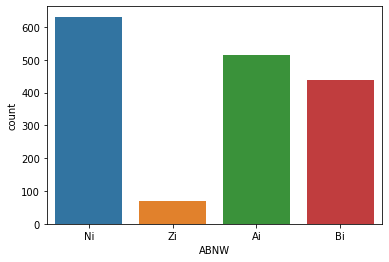

In [21]:
# Visulaization for each class
sns.countplot(Clean_data['ABNW'],label="Count")
plt.show()

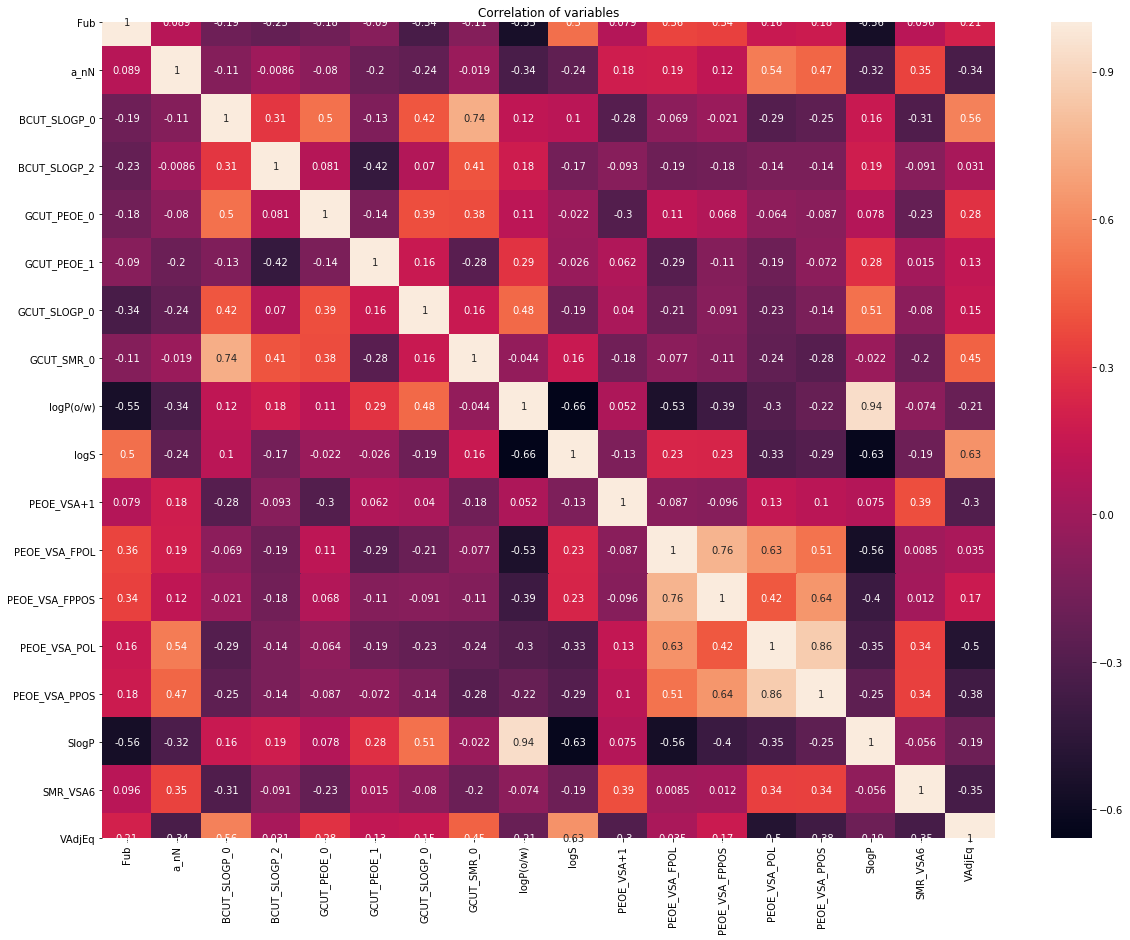

In [22]:
#Correlation matrix of continuous variables.
corr = Clean_data[['Fub', 'a_nN', 'BCUT_SLOGP_0', 'BCUT_SLOGP_2', 'GCUT_PEOE_0',
       'GCUT_PEOE_1', 'GCUT_SLOGP_0', 'GCUT_SMR_0', 'logP(o/w)', 'logS',
       'PEOE_VSA+1', 'PEOE_VSA_FPOL', 'PEOE_VSA_FPPOS', 'PEOE_VSA_POL',
       'PEOE_VSA_PPOS', 'SlogP', 'SMR_VSA6', 'VAdjEq']]
plt.figure(figsize=(20,15))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

In [23]:
Clean_data.columns

Index(['Fub', 'a_base', 'a_nN', 'a_nS', 'BCUT_SLOGP_0', 'BCUT_SLOGP_2',
       'GCUT_PEOE_0', 'GCUT_PEOE_1', 'GCUT_SLOGP_0', 'GCUT_SMR_0', 'logP(o/w)',
       'logS', 'PEOE_VSA+1', 'PEOE_VSA+4', 'PEOE_VSA_FPOL', 'PEOE_VSA_FPPOS',
       'PEOE_VSA_POL', 'PEOE_VSA_PPOS', 'SlogP', 'SlogP_VSA6', 'SMR_VSA6',
       'VAdjEq', 'ABNW', 'SMILES', 'Name'],
      dtype='object')

In [24]:
# Dropping highly coorelated variables with threshold 0.75
Clean_data = Clean_data.drop(['PEOE_VSA_FPOL', 'PEOE_VSA_PPOS','PEOE_VSA_POL','PEOE_VSA_FPPOS'], axis =1)

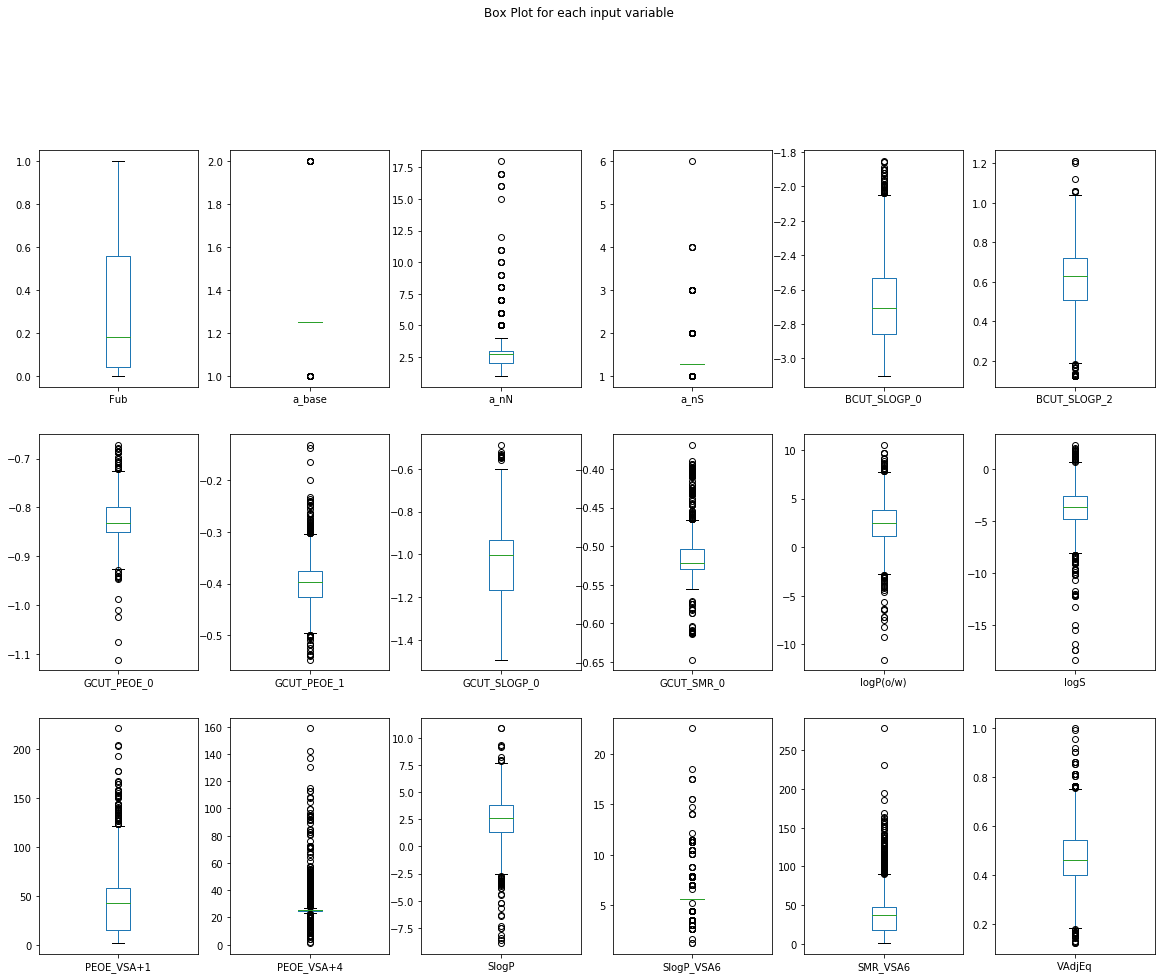

In [25]:
Clean_data.drop(['ABNW','SMILES','Name'], axis=1).plot(kind='box', subplots=True, layout=(4,6), sharex=False, sharey=False, figsize=(20,20), 
                                        title='Box Plot for each input variable')
plt.savefig('Clean_data_box')
plt.show()

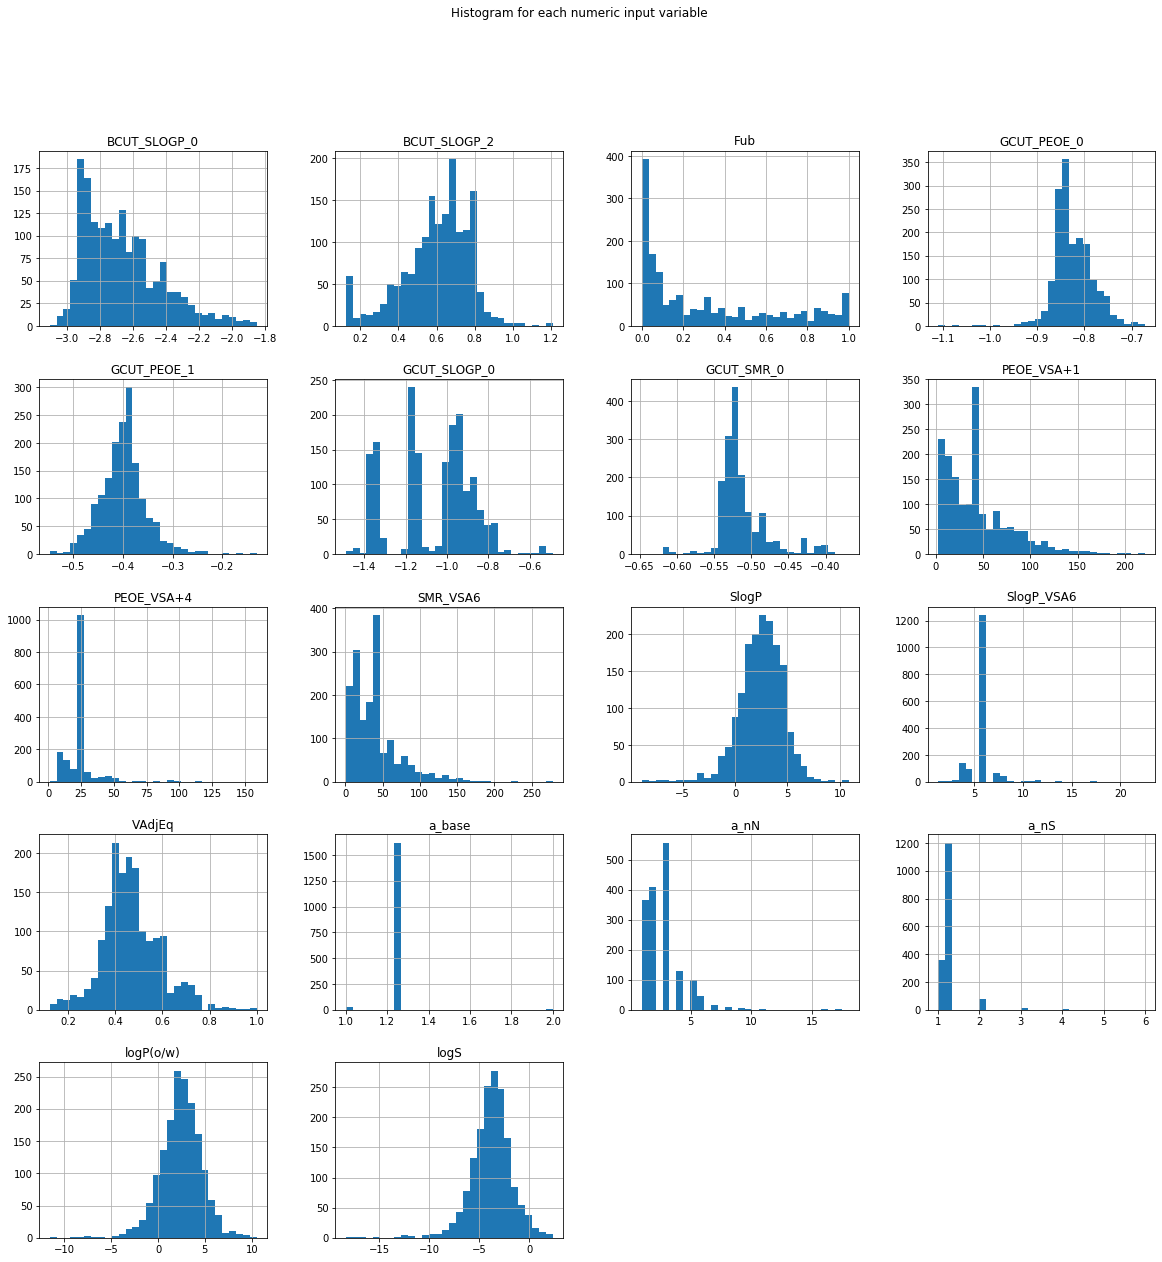

In [26]:
import pylab as pl
Clean_data.drop(['ABNW','SMILES','Name'] ,axis=1).hist(bins=30, figsize=(20,20))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('Clean_data_hist')
plt.show()

In [27]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
Clean_data['ABNW'] = le.fit_transform(Clean_data['ABNW'])
Clean_data['SMILES'] = le.fit_transform(Clean_data['SMILES'])
Clean_data['Name'] = le.fit_transform(Clean_data['Name'])
#display the initial records
Clean_data.head()

,Fub,a_base,a_nN,a_nS,BCUT_SLOGP_0,BCUT_SLOGP_2,GCUT_PEOE_0,GCUT_PEOE_1,GCUT_SLOGP_0,GCUT_SMR_0,...,logS,PEOE_VSA+1,PEOE_VSA+4,SlogP,SlogP_VSA6,SMR_VSA6,VAdjEq,ABNW,SMILES,Name
0,0.15,1.25,2.740549,1.271111,-2.870618,0.397666,-0.794701,-0.367739,-0.923300,-0.539023,...,-4.80278,45.216946,25.622249,3.83840,5.587049,11.375222,0.448864,2,1076,5
1,0.02,1.25,2.740549,1.271111,-2.803789,0.603392,-0.803359,-0.397914,-0.883601,-0.535662,...,-4.21839,43.485901,25.622249,3.60917,4.410796,39.648098,0.514816,2,1108,4
2,0.38,1.25,3.000000,1.271111,-2.888218,0.704054,-0.843703,-0.457774,-1.154434,-0.503589,...,-5.06262,72.015152,8.458519,3.86850,7.759516,87.191391,0.368752,3,405,50
3,0.65,1.25,3.000000,1.271111,-2.888218,0.681423,-0.843702,-0.465880,-1.154434,-0.503591,...,-4.05645,78.265129,8.458519,2.54680,5.587049,87.191391,0.388286,3,403,70
4,0.70,1.25,4.000000,1.271111,-2.888218,0.764078,-0.843702,-0.458581,-1.154434,-0.503591,...,-4.79630,105.451630,8.458519,2.44640,5.587049,87.191391,0.378242,3,412,80


In [28]:
#separating the other attributes from the predicting attribute i.e.PRICE and dropping a_base','a_nS','SlogP_VSA6' 
# &'PEOE_VSA+4' column with over 50% missing value
Clean_data.drop(['a_base','a_nS','SlogP_VSA6','PEOE_VSA+4'], axis=1, inplace=True)

In [29]:
# Feature selection
features =  list(Clean_data.drop(['ABNW'],axis=1))
y = Clean_data.ABNW
x = Clean_data[features]

In [31]:
# Calling library to split the data
from sklearn.model_selection import train_test_split, KFold, cross_val_score 

In [32]:
#Split the data into 67% training and 33% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [33]:
#import the necessary modules for LinearSVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(x_train, y_train).predict(x_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(y_test, pred, normalize = True))

LinearSVC accuracy :  0.3504587155963303


C:\Users\rohit\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


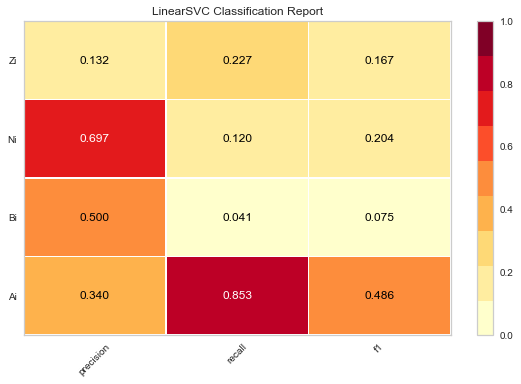

In [34]:
# Instantiate the classification model and visualizer
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(svc_model, classes=['Ai','Bi','Ni','Zi'])
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [35]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the classifier
neigh = KNeighborsClassifier(n_neighbors=7)
#Train the algorithm
neigh.fit(x_train, y_train)
# predict the response
pred = neigh.predict(x_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(y_test, pred))

KNeighbors accuracy score :  0.5339449541284403


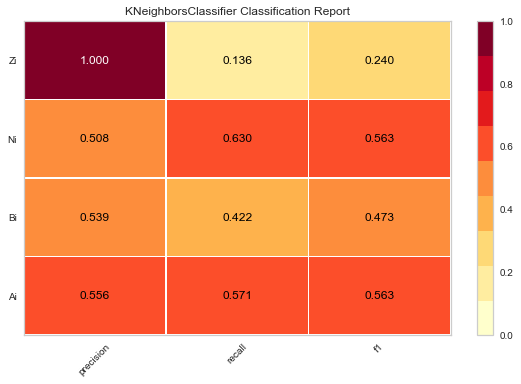

In [36]:
# Instantiate the classification model and visualizer
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(neigh, classes=['Ai','Bi','Ni','Zi'])
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

In [37]:
# Using Pipeline API to create preprocessing and machine learning model (SVC) at once.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

pipe_svc = Pipeline([('std_scl', StandardScaler()), 
                    
                    ('svc', SVC(random_state=1))])

pipe_svc.fit(x_train, y_train)

print('Test Accuracy: %.3f' % pipe_svc.score(x_test, y_test))

Test Accuracy: 0.761


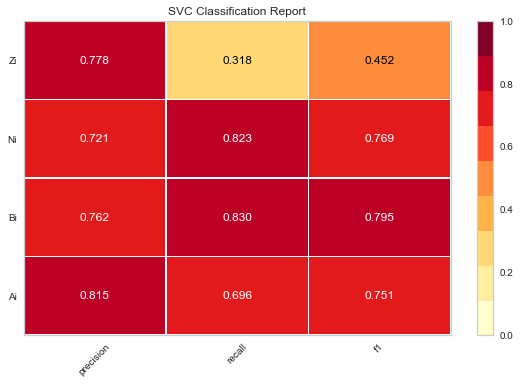

In [38]:
# SVC classification report
from yellowbrick.classifier import ClassificationReport
# Instantiate the classification model and visualizer
visualizer = ClassificationReport(pipe_svc, classes=['Ai','Bi','Ni','Zi'])
visualizer.fit(x_train, y_train) # Fit the training data to the visualizer
visualizer.score(x_test, y_test) # Evaluate the model on the test data
g = visualizer.poof() # Draw/show/poof the data

Cross validation scores: [0.82882883 0.83783784 0.77477477 0.79279279 0.81081081 0.74774775
 0.77477477 0.74545455 0.85454545 0.7706422 ]


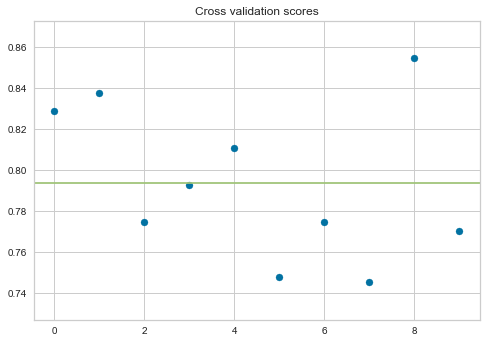

In [39]:
#Cross validation to get general metric of this model to reduce variance of the model.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_svc,
                        X=x_train,
                        y=y_train,
                        cv=10,
                        n_jobs=1)

print('Cross validation scores: %s' % scores)

import matplotlib.pyplot as plt
plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores)), scores)
plt.axhline(y=np.mean(scores), color='g') # Mean value of cross validation scores
plt.show()

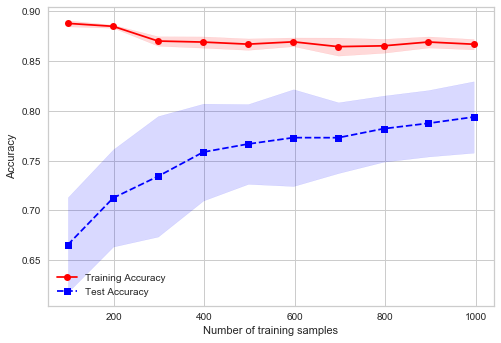

In [40]:
# Learning curve to check if the model is over fitting to given training data and training under appropriate bias 
# and variance balance. 

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_svc,
                                                       X=x_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10)

# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)

# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(train_sizes, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(train_sizes,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(train_sizes, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(train_sizes,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The variance of score against test data is somewhat higher, potenitally indicating over fitting because test scores dropped at the end along with training samples.

In addition, we can have validation score along with a parameter. So next we try to plot validation curve.

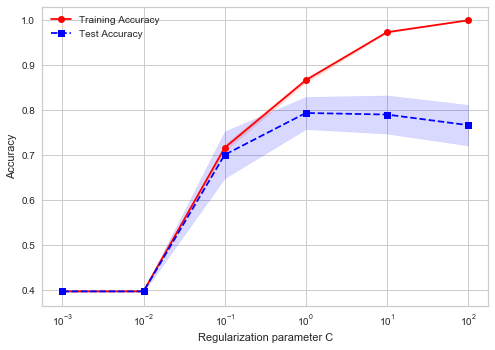

In [41]:
# Validation Curve

from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe_svc,
                                             X=x_train,
                                             y=y_train,
                                             param_name='svc__C',
                                             param_range=param_range,
                                             cv=10)

# Mean value of accuracy against training data
train_mean = np.mean(train_scores, axis=1)

# Standard deviation of training accuracy per number of training samples
train_std = np.std(train_scores, axis=1)

# Same as above for test data
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot training accuracies 
plt.plot(param_range, train_mean, color='red', marker='o', label='Training Accuracy')
# Plot the variance of training accuracies
plt.fill_between(param_range,
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15, color='red')

# Plot for test data as training data
plt.plot(param_range, test_mean, color='blue', linestyle='--', marker='s', 
        label='Test Accuracy')
plt.fill_between(param_range,
                test_mean + test_std,
                test_mean - test_std,
                alpha=0.15, color='blue')

plt.xscale('log')
plt.xlabel('Regularization parameter C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This clearly indicates the overfitting beyond 70% with increase in test data

In [42]:
# Fitting the model using XGBClassifier
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [43]:
pred = model.predict(x_test)
# evaluate accuracy
print (accuracy_score(y_test, pred))
print(accuracy_score(y_train,model.predict(x_train)))

0.8128440366972477
1.0


In [44]:
# Comparision between actual and predicted
y_pred = model.predict(x_test)

In [45]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df
df1

,Actual,Predicted
482,2,2
65,1,1
926,2,2
481,0,2
23,2,1
1089,1,1
561,2,2
259,0,0
1278,2,2
124,0,0


In [46]:
# Instantiate Random and Grid search to select best hyperparameters
y.unique()

array([2, 3, 0, 1], dtype=int64)

In [47]:
params={"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [48]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

In [49]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='multi:softprob',
                    silent=True, nthread=1)

In [50]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='f1_macro', n_jobs=4, cv=skf.split(x_train,y_train), verbose=3, random_state=1001 )


random_search.fit(x_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   18.3s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001AC6730FCC8>,
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.02,
                                           max_delta_step=None, max_dept...
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='warn', n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                 

In [51]:
# Showing best parameters
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, silent=True, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [52]:
pred2 = random_search.predict(x_test)
# evaluate accuracy
print (accuracy_score(y_test, pred2))
print(accuracy_score(y_train,model.predict(x_train)))

0.8091743119266055
1.0


In [53]:
# grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='f1_macro', n_jobs=4, cv=skf.split(x_train,y_train), verbose=3 )
# grid.fit(x_train,y_train)
# print('\n All results:')
# print(grid.cv_results_)
# print('\n Best estimator:')
# print(grid.best_estimator_)
# print('\n Best score:')
# print(grid.best_score_ )
# print('\n Best parameters:')
# print(grid.best_params_)

In [54]:
# Fitting the model with best parameter obtained from random search in best model i.e. XGBClassifier

from xgboost import XGBClassifier
model = XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=3, monotone_constraints=None,
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, silent=True, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, silent=True, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [55]:
# Checking the accuracy of the model with best parameters from random search
model.fit(x_train, y_train)
pred = model.predict(x_test)
# Evaluate accuracy
print (accuracy_score(y_test, pred))
print(accuracy_score(y_train,model.predict(x_train)))

0.8036697247706422
1.0
